In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

In [9]:
import matplotlib.colors as mcolors

In [1]:
from scipy.stats import norm

In [3]:
def ionization_loss_dist(EXYZ):
    widths2= [7,12,12,12,12,12,12]
    df = pd.read_fwf(EXYZ, skiprows=15, skipfooter=1, delimeter=' ', widths= widths2, header=None, engine='python',encoding='latin-1')
    ion_groups=df.groupby(df[0])
    total_elec_energy_loss=[]
    for i in range(1,len(ion_groups)+1):
        ion_num=ion_groups.get_group(i)
        distances_intervals=[]
        avg_stopp_pwr=[]
        x_pos= np.array(ion_num[2].astype(float))
        y_pos= np.array(ion_num[3].astype(float))
        z_pos= np.array(ion_num[4].astype(float))
        elec_stopp_pwr= np.array(ion_num[5].astype(float))
        for j in range(len(x_pos)-1):
            disp_vec= np.array([x_pos[j+1]-x_pos[j],y_pos[j+1]-y_pos[j],z_pos[j+1]-z_pos[j]])
            distances_intervals.append(np.linalg.norm(disp_vec))
        for h in range(len(x_pos)-1):
            avg_stopp_pwr.append((elec_stopp_pwr[h]+elec_stopp_pwr[h+1])/2)
        energy_losses= np.array(distances_intervals)*np.array(avg_stopp_pwr)
        total_losses=np.sum(energy_losses)
        total_elec_energy_loss.append(total_losses)
    return np.array(total_elec_energy_loss)

In [4]:
file_list = ['C://Users/hep/Desktop/Srim_data_(nathan)/10 keV_500 simulations_(exyz)/EXYZ.txt','C://Users/hep/Desktop/Srim_data_(nathan)/20 keV_500 simulations_(exyz)/EXYZ.txt','C://Users/hep/Desktop/Srim_data_(nathan)/30 keV_500 simulations_(exyz)/EXYZ.txt','C://Users/hep/Desktop/Srim_data_(nathan)/40 keV_500 simulations_(exyz)/EXYZ.txt','C://Users/hep/Desktop/Srim_data_(nathan)/50 keV_500 simulations_(exyz)/EXYZ.txt','C://Users/hep/Desktop/Srim_data_(nathan)/60 keV_500 simulations_(exyz)/EXYZ.txt','C://Users/hep/Desktop/Srim_data_(nathan)/70 keV_500 simulations_(exyz)/EXYZ.txt','C://Users/hep/Desktop/Srim_data_(nathan)/80 keV_500 simulations_(exyz)/EXYZ.txt','C://Users/hep/Desktop/Srim_data_(nathan)/90 keV_500 simulations_(exyz)/EXYZ.txt','C://Users/hep/Desktop/Srim_data_(nathan)/100 keV_500 simulations_(exyz)/EXYZ.txt']

In [5]:
dist_list= []
for file in file_list:
    dist_list.append(ionization_loss_dist(file))

In [6]:
flattned_dist_list = np.concatenate(dist_list)

In [7]:
num_repeats = 500
start = 10
end = 100
step = 10

ordered_list = [num for num in range(start, end + step, step) for _ in range(num_repeats)]

C:\Users\hep\AppData\Local\Temp\ipykernel_12908\2050637560.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


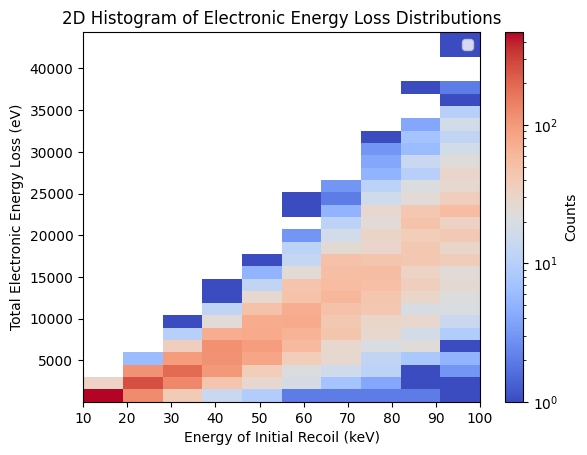

In [23]:
hist= plt.hist2d(ordered_list,flattned_dist_list,bins=(10,30),cmap='coolwarm',norm=mcolors.LogNorm())
plt.xlabel('Energy of Initial Recoil (keV)')
plt.ylabel('Total Electronic Energy Loss (eV)')
plt.title('2D Histogram of Electronic Energy Loss Distributions')
plt.legend()
plt.colorbar(label="Counts")
plt.show()

In [10]:
data = dist_list[3]    

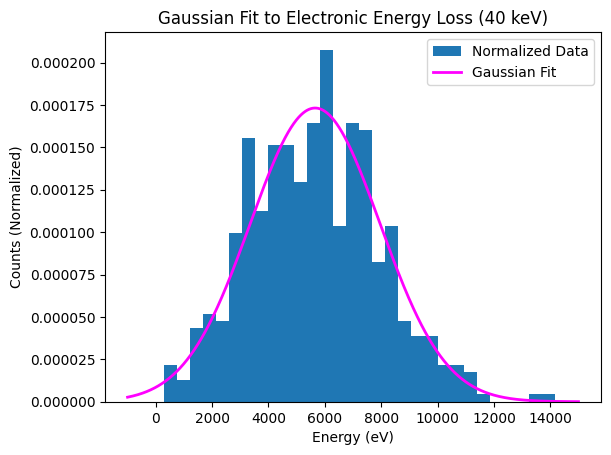

In [11]:
(mu,sigma) = norm.fit(data)
x= np.linspace(-1000,15000,1000)
p = norm.pdf(x,mu,sigma)
plt.hist(data,bins=30,density=True,label="Normalized Data")
plt.plot(x,p,linewidth=2,color='magenta',label="Gaussian Fit")
plt.xlabel("Energy (eV)")
plt.ylabel("Counts (Normalized)")
plt.title("Gaussian Fit to Electronic Energy Loss (40 keV)")
plt.legend()
plt.show()

In [47]:
from scipy.optimize import curve_fit

In [49]:
def gaussian(x, mu, sigma):
    return norm.pdf(x, mu, sigma)
c=[]
c_errors=[]
for i in range(len(dist_list)):
    data = dist_list[i]
    mu,sigma = norm.fit(data)
    bin_edges = np.histogram_bin_edges(data, bins='auto')
    bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
    hist, _ = np.histogram(data, bins=bin_edges, density=True)
    popt, pcov = curve_fit(gaussian, bin_centers, hist, p0=[mu, sigma])
    perr = np.sqrt(np.diag(pcov)) 
    mu_err, sigma_err = perr
    cv_value = sigma / mu
    cv_error = cv_value * np.sqrt((sigma_err / sigma)**2 + (mu_err / mu)**2)
    c.append(sigma/mu) 
    c_errors.append(cv_error)      

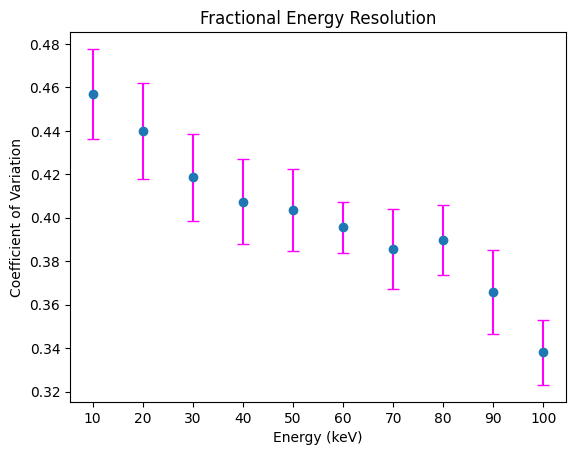

In [58]:
plt.errorbar(np.linspace(10,100,10),c,yerr= c_errors,ecolor='magenta',capsize=4,fmt='o')
plt.xticks(np.arange(10, 101, 10))
plt.xlabel("Energy (keV)")
plt.ylabel("Coefficient of Variation")
plt.title("Fractional Energy Resolution")
plt.show()

In [27]:
widths2= [1,7,4,12,11,11,11,4,3]
df = pd.read_fwf('C://Users/hep/Desktop/Srim_data_(nathan)/10 keV_500 simulations_(exyz)/COLLISON.txt', skiprows=28, skipfooter=1, delimeter=' ', widths= widths2, header=None, engine='python',encoding='latin-1')

In [28]:
df['Group'] = (df[1] == 'For Io').cumsum()

In [29]:
ion_groups = df.groupby("Group")

In [30]:
ion_event= ion_groups.get_group(1)

In [31]:
ion_event= ion_event[ion_event[0]=="Û"]

In [32]:
angle_dist_list= []
for i in range((ion_groups.ngroups)-1):
    vector_sum = np.array([0,0,0],dtype= np.float64)
    enrgy_sum= 0
    ion_event = ion_groups.get_group(i)
    ion_event= ion_event[ion_event[0]=="Û"]
    recoil_count= ion_event[1].astype(int)
    reset_condition = (recoil_count <= recoil_count.shift(fill_value=0)).cumsum()
    cascades = ion_event.groupby(reset_condition)
    for j in range(cascades.ngroups):
        cluster= cascades.get_group(j)
        x_coordinates= np.array(cluster[4],dtype=np.float64)
        y_coordinates = np.array(cluster[5],dtype=np.float64)
        z_coordinates = np.array(cluster[6],dtype=np.float64)
        recoil_energies = np.array(cluster[3], dtype = np.float64)
        enrgy_weighted_vec = (recoil_energies[0])*(np.array([np.mean(x_coordinates),np.mean(y_coordinates),np.mean(z_coordinates)]))
        vector_sum += enrgy_weighted_vec 
        enrgy_sum += (recoil_energies[0])
    final_weightd_vec= vector_sum/(enrgy_sum)
    dot_product = np.dot(np.array([1,0,0]), final_weightd_vec)
    magnitude1 = 1
    magnitude2 = np.linalg.norm(final_weightd_vec)
    cosine_angle = dot_product / (magnitude1 * magnitude2)
    angle_radians = np.arccos(cosine_angle)
    angle_degrees = np.degrees(angle_radians)
    angle_dist_list.append(angle_degrees)


In [33]:
data = angle_dist_list

In [34]:
mean_value= np.mean(data)
lower_percentile= np.percentile(data,16)
upper_percentile= np.percentile(data,84)

In [35]:
upper_percentile-lower_percentile

np.float64(26.89622991726438)

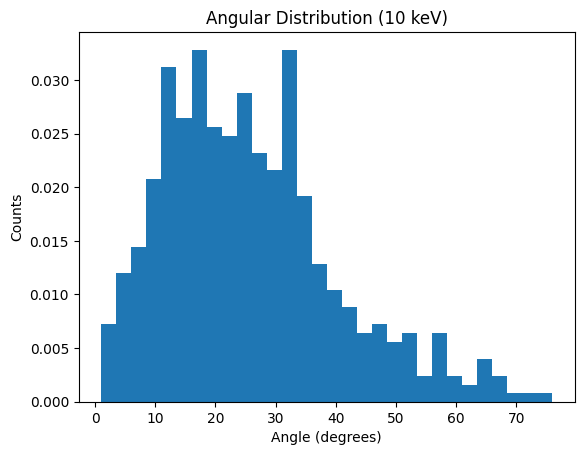

In [36]:
plt.hist(data, bins=30, density=True)
plt.xlabel('Angle (degrees)')
plt.ylabel("Counts")
plt.title("Angular Distribution (10 keV)")
plt.show()

In [25]:
file_list2= ['C://Users/hep/Desktop/Srim_data_(nathan)/10 keV_500 simulations_(exyz)/COLLISON.txt','C://Users/hep/Desktop/Srim_data_(nathan)/20 keV_500 simulations_(exyz)/COLLISON.txt','C://Users/hep/Desktop/Srim_data_(nathan)/30 keV_500 simulations_(exyz)/COLLISON.txt','C://Users/hep/Desktop/Srim_data_(nathan)/40 keV_500 simulations_(exyz)/COLLISON.txt','C://Users/hep/Desktop/Srim_data_(nathan)/50 keV_500 simulations_(exyz)/COLLISON.txt','C://Users/hep/Desktop/Srim_data_(nathan)/60 keV_500 simulations_(exyz)/COLLISON.txt','C://Users/hep/Desktop/Srim_data_(nathan)/70 keV_500 simulations_(exyz)/COLLISON.txt','C://Users/hep/Desktop/Srim_data_(nathan)/80 keV_500 simulations_(exyz)/COLLISON.txt','C://Users/hep/Desktop/Srim_data_(nathan)/90 keV_500 simulations_(exyz)/COLLISON.txt','C://Users/hep/Desktop/Srim_data_(nathan)/100 keV_500 simulations_(exyz)/COLLISON.txt']

In [37]:
def angular_dist(file):
    widths2= [1,7,4,12,11,11,11,4,3]
    df = pd.read_fwf(file, skiprows=28, skipfooter=1, delimeter=' ', widths= widths2, header=None, engine='python',encoding='latin-1')
    df['Group'] = (df[1] == 'For Io').cumsum()
    ion_groups = df.groupby("Group")
    angle_dist_list= []
    for i in range((ion_groups.ngroups)-1):
        vector_sum = np.array([0,0,0],dtype= np.float64)
        enrgy_sum= 0
        ion_event = ion_groups.get_group(i)
        ion_event= ion_event[ion_event[0]=="Û"]
        recoil_count= ion_event[1].astype(int)
        reset_condition = (recoil_count <= recoil_count.shift(fill_value=0)).cumsum()
        cascades = ion_event.groupby(reset_condition)
        for j in range(cascades.ngroups):
            cluster= cascades.get_group(j)
            x_coordinates= np.array(cluster[4],dtype=np.float64)
            y_coordinates = np.array(cluster[5],dtype=np.float64)
            z_coordinates = np.array(cluster[6],dtype=np.float64)
            recoil_energies = np.array(cluster[3], dtype = np.float64)
            enrgy_weighted_vec = (recoil_energies[0])*(np.array([np.mean(x_coordinates),np.mean(y_coordinates),np.mean(z_coordinates)]))
            vector_sum += enrgy_weighted_vec 
            enrgy_sum += (recoil_energies[0])
        final_weightd_vec= vector_sum/(enrgy_sum)
        dot_product = np.dot(np.array([1,0,0]), final_weightd_vec)
        magnitude1 = 1
        magnitude2 = np.linalg.norm(final_weightd_vec)
        cosine_angle = dot_product / (magnitude1 * magnitude2)
        angle_radians = np.arccos(cosine_angle)
        angle_degrees = np.degrees(angle_radians)
        angle_dist_list.append(angle_degrees)
    return(angle_dist_list)

In [38]:
angular_dist_all_enrgs=[]
for f in file_list2:
    angular_dist_all_enrgs.append(angular_dist(f))

In [39]:
flattened_ang_list= np.concatenate(angular_dist_all_enrgs)

C:\Users\hep\AppData\Local\Temp\ipykernel_12908\3660630381.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


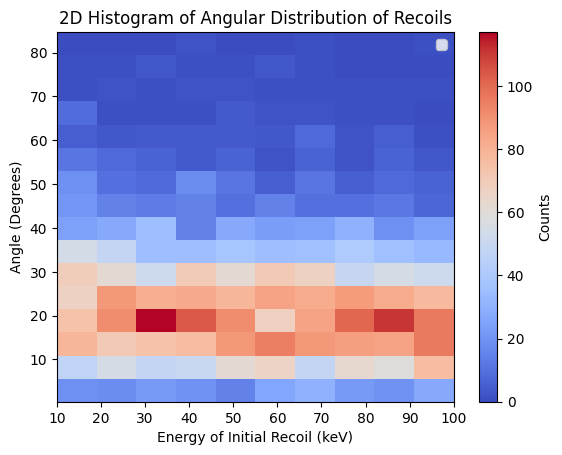

In [60]:
plt.hist2d(ordered_list,flattened_ang_list,bins=(10,16),cmap='coolwarm')
plt.xlabel('Energy of Initial Recoil (keV)')
plt.ylabel('Angle (Degrees)')
plt.title('2D Histogram of Angular Distribution of Recoils')
plt.legend()
plt.colorbar(label="Counts")
plt.show()

In [44]:
ang_res= []
error_list = []
for i in range(len(angular_dist_all_enrgs)):
    data = angular_dist_all_enrgs[i]
    mean_value= np.mean(data)
    upper_percentile= np.percentile(data,68)
    upper_error= np.percentile(data,78)
    lower_error = np.percentile(data,60)
    spread = upper_percentile
    error= upper_error-lower_error
    ang_res.append(spread)
    error_list.append(error)

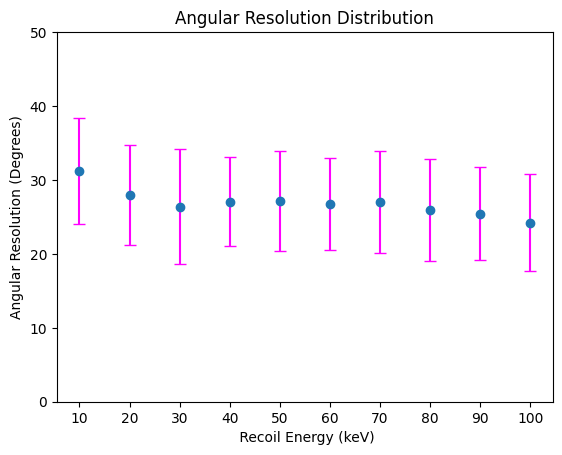

In [59]:
plt.errorbar(np.linspace(10,100,10),ang_res,yerr= error_list,ecolor='magenta',capsize=4,fmt='o')
plt.xticks(np.arange(10, 101, 10))
plt.xlabel(" Recoil Energy (keV)")
plt.ylabel("Angular Resolution (Degrees)")
plt.title("Angular Resolution Distribution")
plt.ylim(0,50)
plt.show()